Source Code for question 3

In [2]:
from PIL import Image
import math
import matplotlib.pyplot as plt
from copy import copy, deepcopy
import numpy as np
from datetime import datetime

In [3]:
def x_y_resize(image, factor_x, factor_y, inter="BL", offset_x = 0, offset_y = 0, debug = False):
    height = image.shape[0]
    width = image.shape[1]
    new_height = int(image.shape[0] * factor_y)
    new_width = int(image.shape[1] * factor_x)
    base = np.zeros((new_height, new_width, image.shape[2]))
    base_height = new_height
    base_width = new_width
    for row in range(new_height + 1):
        for col in range(new_width + 1):
            original_point = [row / factor_y, col / factor_x]
            original_y = int(math.floor(original_point[0]))
            original_x = int(math.floor(original_point[1]))
            ratio_y = original_point[0] - original_y
            ratio_x = original_point[1] - original_x
            has_zeroed = False
            if row + offset_y < base_height and col + offset_x < base_width:
                original_x -= 1
                original_y -= 1
                if 0 <= original_y < height and 0 <= original_x < width :
                    if debug:
                        print("for row = ", row + offset_y, " and col = ", col + offset_x, " x = ", original_x, " y = ", original_y)
                    if not has_zeroed:
                        base[row + offset_y, col + offset_x, :] = np.zeros(image.shape[2])
                        has_zeroed = True
                    base[row + offset_y, col + offset_x, :] += ((1 - ratio_y) * (1 - ratio_x) * image[original_y, original_x, :]).astype(np.uint8)
                if 0 <= original_y < height and 0 <= original_x + 1 < width :
                    if debug:
                        print("for row = ", row + offset_y, " and col = ", col + offset_x, " x = ", original_x + 1, " y = ", original_y)
                    if not has_zeroed:
                        base[row + offset_y, col + offset_x, :] = np.zeros(image.shape[2])
                        has_zeroed = True
                    base[row + offset_y, col + offset_x, :] += ((1 - ratio_y) * (ratio_x) * image[original_y, original_x + 1, :]).astype(np.uint8)
                if 0 <= original_y + 1 < height and 0 <= original_x < width :
                    if debug:
                        print("for row = ", row + offset_y, " and col = ", col + offset_x, " x = ", original_x, " y = ", original_y + 1)
                    if not has_zeroed:
                        base[row + offset_y, col + offset_x, :] = np.zeros(image.shape[2])
                        has_zeroed = True
                    base[row + offset_y, col + offset_x, :] += ((ratio_y) * (1 - ratio_x) * image[original_y + 1, original_x, :]).astype(np.uint8)
                if 0 <= original_y + 1 < height and 0 <= original_x + 1 < width :
                    if debug:
                        print("for row = ", row + offset_y, " and col = ", col + offset_x, " x = ", original_x + 1, " y = ", original_y + 1)
                    if not has_zeroed:
                        base[row + offset_y, col + offset_x, :] = np.zeros(image.shape[2])
                        has_zeroed = True
                    base[row + offset_y, col + offset_x, :] += ((ratio_y) * (ratio_x) * image[original_y + 1, original_x + 1, :]).astype(np.uint8)
    return base.astype(int)

In [4]:
def extract_histogram(image):
    image_height = image.shape[0]
    image_width = image.shape[1]
    histogram = []
    for i in range(image.shape[2]):
        histogram.append([0] * 256)

    for i in range(image_height):
        for j in range(image_width):
            for rgb in range(image.shape[2]):
                histogram[rgb][image[i, j, rgb]] += 1

    return histogram

In [5]:
def extract_p_h(histogram, h, w):
    ph = [0] * 256
    hw = h * w
    for i in range(256):
        ph[i] = (histogram[i] / hw)
    return ph

In [6]:
def generate_equalized_lookup_table(hp):
    lut = [0] * 256
    for i in range(256):
        for j in range(i + 1):
            lut[i] += round(hp[j] * 255)
    return lut

In [7]:
def plot_histogram(histogram, l='H', x='GRAY LEVEL', y='COUNT', t='HISTOGRAM'):
    plt.bar(list(range(256)), histogram, label=l)
    plt.legend()

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)

[]

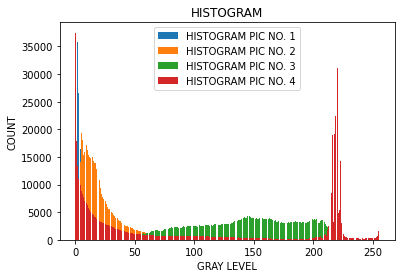

In [83]:
bad_pic1 = Image.open("he1.jpg").convert("RGB")
bad_pic1 = np.array(bad_pic1)

bad_pic2 = Image.open("he2.jpg").convert("RGB")
bad_pic2 = np.array(bad_pic2)

bad_pic3 = Image.open("he3.jpg").convert("RGB")
bad_pic3 = np.array(bad_pic3)

bad_pic4 = Image.open("he4.jpg").convert("RGB")
bad_pic4 = np.array(bad_pic4)
h = extract_histogram(bad_pic1)
plot_histogram(h[i], l="HISTOGRAM PIC NO. 1")
    
h = extract_histogram(bad_pic2)
plot_histogram(h[i], l="HISTOGRAM PIC NO. 2")
    
h = extract_histogram(bad_pic3)
plot_histogram(h[i], l="HISTOGRAM PIC NO. 3")
    
h = extract_histogram(bad_pic4)
plot_histogram(h[i], l="HISTOGRAM PIC NO. 4")
    

plt.plot()

In [8]:
def normalize_image(lut, image, base):
    base = deepcopy(base)
    image_height = image.shape[0]
    image_width = image.shape[1]
    for i in range(image_height):
        for j in range(image_width):
            for rgb in range(image.shape[2]):
                base[i, j, rgb] = lut[rgb][image[i, j, rgb]]
    return base

In [9]:
def normalization_pipeline(base, image):
    h = extract_histogram(image)
    lut = []

    for i in range(image.shape[2]):
        lut.append(generate_equalized_lookup_table(extract_p_h(h[i], image.shape[0], image.shape[1])))

    ni =  normalize_image(lut, image, base)
    return ni

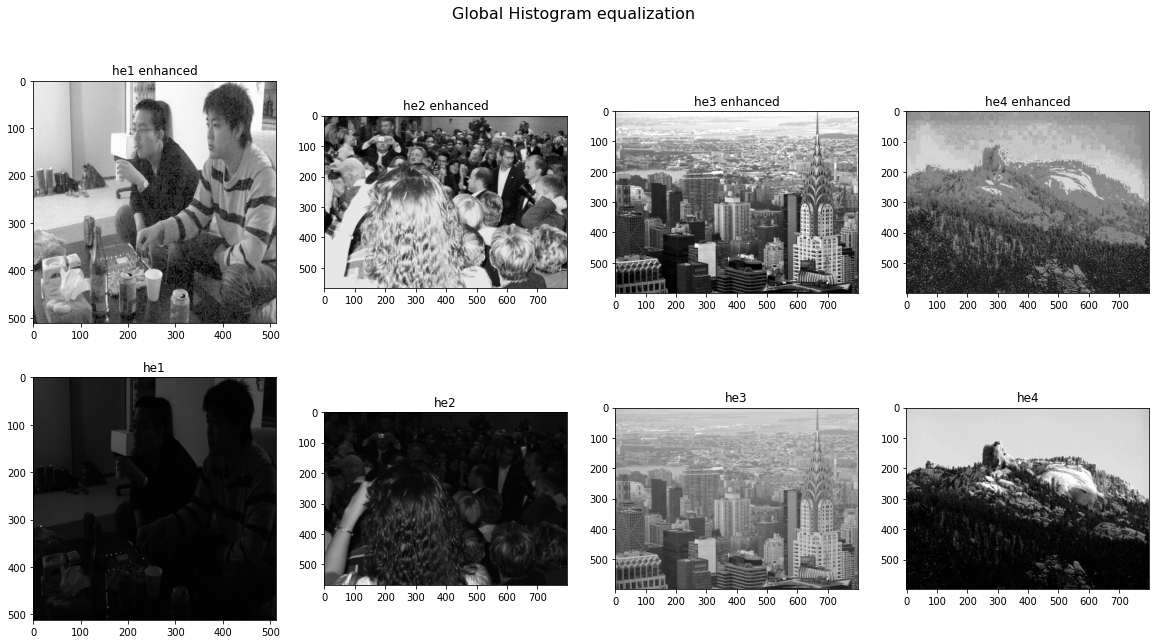

In [86]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Global Histogram equalization', fontsize=16)
base = np.zeros(bad_pic1.shape)
temp = normalization_pipeline(base, bad_pic1)
axs[0][0].imshow(temp.astype(np.int32))
axs[0][0].set_title('he1 enhanced')

base = np.zeros(bad_pic2.shape)
temp = normalization_pipeline(base, bad_pic2)
axs[0][1].imshow(temp.astype(np.int32))
axs[0][1].set_title('he2 enhanced')

base = np.zeros(bad_pic3.shape)
temp = normalization_pipeline(base, bad_pic3)
axs[0][2].imshow(temp.astype(np.int32))
axs[0][2].set_title('he3 enhanced')

base = np.zeros(bad_pic4.shape)
temp = normalization_pipeline(base, bad_pic4)
axs[0][3].imshow(temp.astype(np.int32))
axs[0][3].set_title('he4 enhanced')

axs[1][0].imshow(bad_pic1.astype(np.int32))
axs[1][0].set_title('he1')

axs[1][1].imshow(bad_pic2.astype(np.int32))
axs[1][1].set_title('he2')

axs[1][2].imshow(bad_pic3.astype(np.int32))
axs[1][2].set_title('he3')

axs[1][3].imshow(bad_pic4.astype(np.int32))
axs[1][3].set_title('he4')

plt.show()

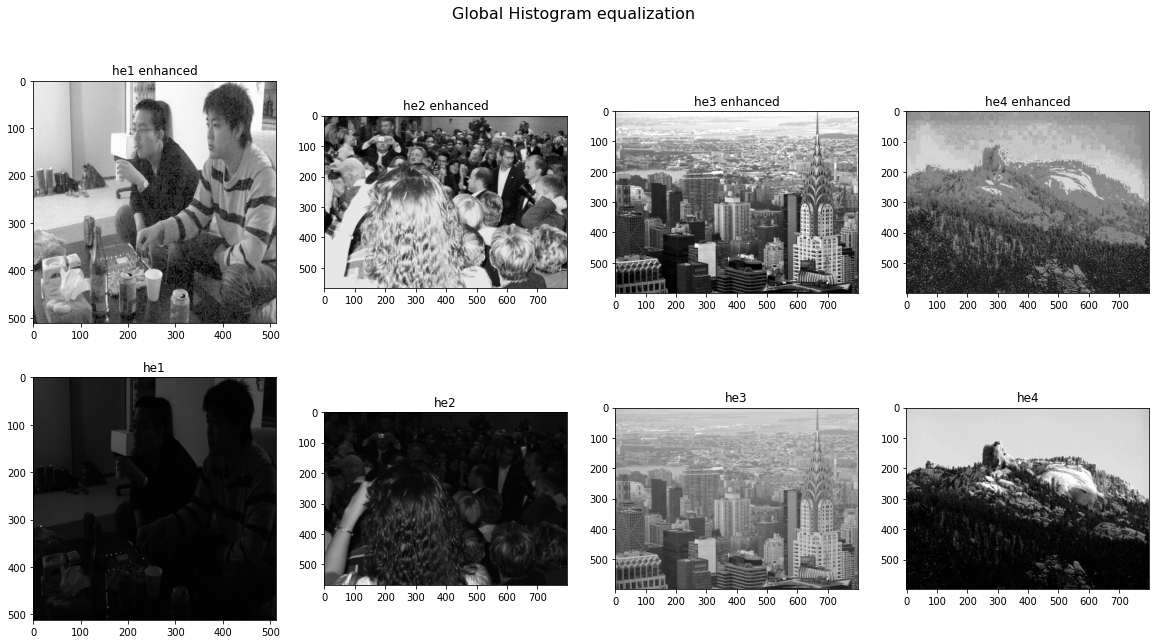

In [11]:
def extract_image(image, name="res"):
    pil_img=Image.fromarray((image).astype(np.uint8))
    pil_img.save("./" + str(name) +  ".png")
    return pil_img
bad_pic1 = Image.open("he1.jpg").convert("RGB")
bad_pic1 = np.array(bad_pic1)

bad_pic2 = Image.open("he2.jpg").convert("RGB")
bad_pic2 = np.array(bad_pic2)

bad_pic3 = Image.open("he3.jpg").convert("RGB")
bad_pic3 = np.array(bad_pic3)

bad_pic4 = Image.open("he4.jpg").convert("RGB")
bad_pic4 = np.array(bad_pic4)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Global Histogram equalization', fontsize=16)
base = np.zeros(bad_pic1.shape)
temp = normalization_pipeline(base, bad_pic1)
extract_image(temp, "HE1_enhanced")
axs[0][0].imshow(temp.astype(np.int32))
axs[0][0].set_title('he1 enhanced')

base = np.zeros(bad_pic2.shape)
temp = normalization_pipeline(base, bad_pic2)
extract_image(temp, "HE2_enhanced")
axs[0][1].imshow(temp.astype(np.int32))
axs[0][1].set_title('he2 enhanced')

base = np.zeros(bad_pic3.shape)
temp = normalization_pipeline(base, bad_pic3)
extract_image(temp, "HE3_enhanced")
axs[0][2].imshow(temp.astype(np.int32))
axs[0][2].set_title('he3 enhanced')

base = np.zeros(bad_pic4.shape)
temp = normalization_pipeline(base, bad_pic4)
extract_image(temp, "HE4_enhanced")
axs[0][3].imshow(temp.astype(np.int32))
axs[0][3].set_title('he4 enhanced')

axs[1][0].imshow(bad_pic1.astype(np.int32))
axs[1][0].set_title('he1')

axs[1][1].imshow(bad_pic2.astype(np.int32))
axs[1][1].set_title('he2')

axs[1][2].imshow(bad_pic3.astype(np.int32))
axs[1][2].set_title('he3')

axs[1][3].imshow(bad_pic4.astype(np.int32))
axs[1][3].set_title('he4')

plt.show()

In [13]:
def ratio_mix(base, image, enhanced, alpha):
    image_height = image.shape[0]
    image_width = image.shape[1]
    for i in range(image_height):
        for j in range(image_width):
            for rgb in range(image.shape[2]):
                base[i, j, rgb] = round((alpha) * image[i, j, rgb] + (1 - alpha) * enhanced[i, j, rgb])
    return base

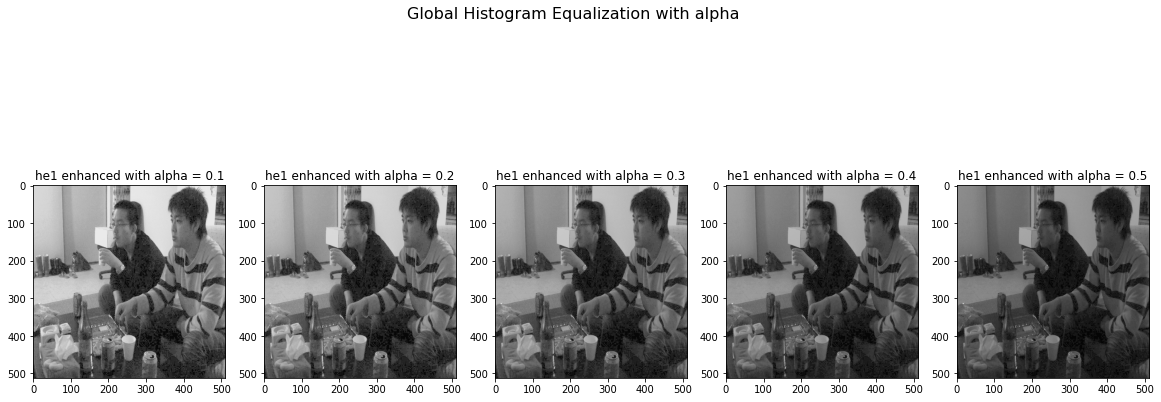

In [89]:
fig, axs = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('Global Histogram Equalization with alpha', fontsize=16)
for i in range(1, 6):
    alpha = i / 10.0
    base = np.zeros(bad_pic1.shape)
    temp = normalization_pipeline(base, bad_pic1)
    res = ratio_mix(np.zeros(bad_pic1.shape), bad_pic1, temp, alpha)
    axs[i - 1].imshow(res.astype(np.int32))
    axs[i - 1].set_title('he1 enhanced with alpha = ' + str(alpha))

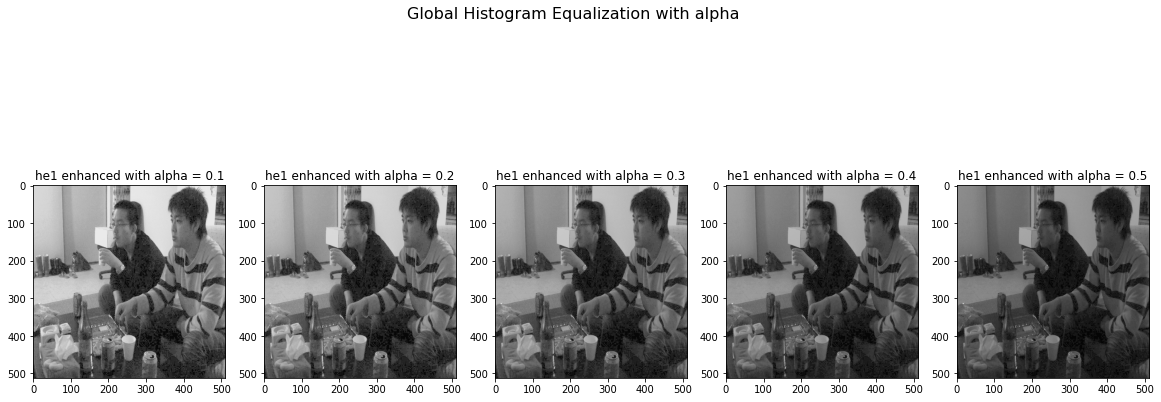

In [15]:
def extract_image(image, name="res"):
    pil_img=Image.fromarray((image).astype(np.uint8))
    pil_img.save("./" + str(name) +  ".png")
    return pil_img
fig, axs = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('Global Histogram Equalization with alpha', fontsize=16)
for i in range(1, 6):
    alpha = i / 10.0
    base = np.zeros(bad_pic1.shape)
    temp = normalization_pipeline(base, bad_pic1)
    res = ratio_mix(np.zeros(bad_pic1.shape), bad_pic1, temp, alpha)
    extract_image(res, "he1_enhanced_alpha" + str(alpha))
    axs[i - 1].imshow(res.astype(np.int32))
    axs[i - 1].set_title('he1 enhanced with alpha = ' + str(alpha))

In [95]:
def localized_histogram_enhancement(base, image, window_h, window_w):
    image_height = image.shape[0] or 3
    image_width = image.shape[1] or 3
    offset_winh = int(math.floor(window_h / 2.0))
    offset_winw = int(math.floor(window_w / 2.0))


    histogram = []
    for _ in range(image.shape[2]):
        histogram.append([0] * 256)
    hw = 0
    sw = 0
    for i in range(image_height):
        sw = 0 if i % 2 == 0 else 1
        if sw == 1:
            j = image_width - 1
            while j >= 0:
                if j == image_width - 1:
                    for n in range(window_w):
                        if 0 <= i - 1 + (0 - offset_winh) < image_height and 0 <= j + (n - offset_winw) < image_width:
                            hw -= 1
                            for rgb in range(image.shape[2]):
                                histogram[rgb][image[i - 1 + (0 - offset_winh), j + (n - offset_winw), rgb]] -= 1
                        if 0 <= i + (window_h - 1 - offset_winh) < image_height and 0 <= j + (n - offset_winw) < image_width:
                            hw += 1
                            for rgb in range(image.shape[2]):
                                histogram[rgb][image[i + (window_h - 1 - offset_winh), j + (n - offset_winw), rgb]] += 1
                    pass
                elif j < (image_width - 1):
                    for m in range(window_h):
                        if 0 <= i + (m - offset_winh) < image_height and 0 <= j + (0 - offset_winw) < image_width:
                            hw += 1
                            for rgb in range(image.shape[2]):
                                histogram[rgb][image[i + (m - offset_winh), j + (0 - offset_winw), rgb]] += 1
                        if 0 <= i + (m - offset_winh) < image_height and 0 <= j + 1 + (window_w - 1 - offset_winw) < image_width:
                            hw -= 1
                            for rgb in range(image.shape[2]):
                                histogram[rgb][image[i + (m - offset_winh), j + 1 + (window_w - 1 - offset_winw), rgb]] -= 1
                lut = []
                hw = hw if hw > 0 else 1
                for k in range(image.shape[2]):
                    ph = [0] * 256
                    for a in range(256):
                        ph[a] = (histogram[k][a] / hw)
                    lut.append(generate_equalized_lookup_table(ph))

                for rgb in range(image.shape[2]):
                    base[i, j, rgb] = lut[rgb][image[i, j, rgb]]
                j -= 1
            pass
        else:
            j = 0
            while j < image_width:
                if j == 0 and i > 0:
                    for n in range(window_w):
                        if 0 <= i - 1 + (0 - offset_winh) < image_height and 0 <= j + (n - offset_winw) < image_width:
                            hw -= 1
                            for rgb in range(image.shape[2]):
                                histogram[rgb][image[i - 1 + (0 - offset_winh), j + (n - offset_winw), rgb]] -= 1
                        if 0 <= i + (window_h - 1 - offset_winh) < image_height and 0 <= j + (n - offset_winw) < image_width:
                            hw += 1
                            for rgb in range(image.shape[2]):
                                histogram[rgb][image[i + (window_h - 1 - offset_winh), j + (n - offset_winw), rgb]] += 1
                if j == 0 and i == 0:
                    for m in range(window_h):
                        for n in range(window_w):
                            if 0 <= i + (m - offset_winh) < image_height and 0 <= j + (n - offset_winw) < image_width:
                                hw += 1
                                for rgb in range(image.shape[2]):
                                    histogram[rgb][image[i + (m - offset_winh), j + (n - offset_winw), rgb]] += 1
                elif j > 0:
                    for m in range(window_h):
                        if 0 <= i + (m - offset_winh) < image_height and 0 <= j - 1 + (0 - offset_winw) < image_width:
                            hw -= 1
                            for rgb in range(image.shape[2]):
                                histogram[rgb][image[i + (m - offset_winh), j - 1 + (0 - offset_winw), rgb]] -= 1
                        if 0 <= i + (m - offset_winh) < image_height and 0 <= j + (window_w - 1 - offset_winw) < image_width:
                            hw += 1
                            for rgb in range(image.shape[2]):
                                histogram[rgb][image[i + (m - offset_winh), j + (window_w - 1 - offset_winw), rgb]] += 1
                lut = []
                hw = hw if hw > 0 else 1
                for k in range(image.shape[2]):
                    ph = [0] * 256
                    for a in range(256):
                        ph[a] = (histogram[k][a] / hw)
                    lut.append(generate_equalized_lookup_table(ph))

                for rgb in range(image.shape[2]):
                    base[i, j, rgb] = lut[rgb][image[i, j, rgb]]
                j += 1
        for rgb in range(image.shape[2]):
            _max = base[i, :, rgb].max()
            if _max <= 255:
                continue
            base[i, :, rgb] = ((base[i, :, rgb] * 255) / _max).astype(int)
            pass

    return base

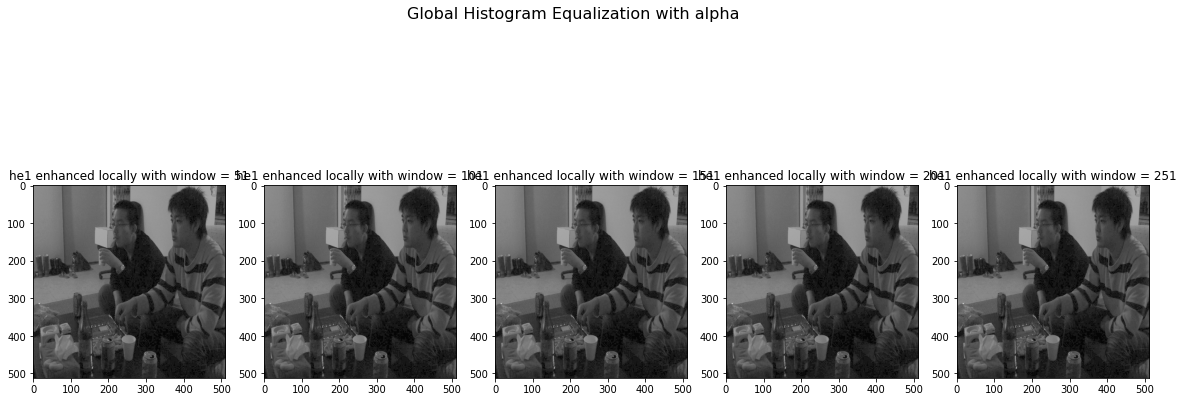

In [96]:
#it takes a lot of time that's why we make the photo smaller
bad_pic1_small = Image.open("he1.jpg").convert("RGB")
bad_pic1_small = np.array(bad_pic1_small)
bad_pic1_small = x_y_resize(bad_pic1_small, 0.35, 0.35)

fig, axs = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('Global Histogram Equalization with alpha', fontsize=16)
sizes = [51, 101, 151, 201, 251]
for i in range(5):
    base = np.zeros(bad_pic1.shape)
    temp = localized_histogram_enhancement(base, bad_pic1_small, sizes[i], sizes[i])
    axs[i].imshow(res.astype(np.int32))
    axs[i].set_title('he1 enhanced locally with window = ' + str(sizes[i]))

In [16]:
def lhe_with_interpol(base, image, window_h, window_w):
    image_height = image.shape[0] or 3
    image_width = image.shape[1] or 3
    lut_all = dict()

    offset_winh = int(math.floor(window_h / 2.0))
    offset_winw = int(math.floor(window_w / 2.0))
    for i in range(0, image_height + ((window_h // 2) - (image_height % (window_h // 2))) + 1, window_h // 2):
        for j in range(0, image_width + ((window_w // 2) - (image_width % (window_w // 2))) + 1, window_w // 2):
            hw = 0
            histogram = []
            for _ in range(image.shape[2]):
                histogram.append([0] * 256)
            for m in range(window_h):
                for n in range(window_w):
                    if 0 <= i + (m - offset_winh) < image_height and 0 <= j + (n - offset_winw) < image_width:
                        hw += 1
                        for rgb in range(image.shape[2]):
                            histogram[rgb][image[i + (m - offset_winh), j + (n - offset_winw), rgb]] += 1
            lut = []
            hw = hw if hw > 0 else 1
            for k in range(image.shape[2]):
                ph = [0] * 256
                for a in range(256):
                    ph[a] = (histogram[k][a] / hw)
                lut.append(generate_equalized_lookup_table(ph))
            lut_all[(i, j)] = lut

    padding_h = (image_height + (window_h // 2 - image_height % (window_h // 2))) - image_height
    padding_w = (image_width + (window_w // 2 - image_width % (window_w // 2))) - image_width
    temp = 0
    for i in range(image_height):
        for j in range(image_width):
            x1 = i - (i % (window_h // 2))
            y1 = j - (j % (window_w // 2))
            x2 = i + ((window_h // 2) - (i % (window_h // 2)))
            y2 = j + ((window_w // 2) - (j % (window_w // 2)))

            x1_weight = (i - x1) / ((x2) - (x1))
            y1_weight = (j - y1) / ((y2) - (y1))
            x2_weight = (x2 - i) / ((x2) - (x1))
            y2_weight = (y2 - j) / ((y2) - (y1))

            ul = lut_all[(x1, y1)]
            ur = lut_all[(x1, y2)]
            dl = lut_all[(x2, y1)]
            dr = lut_all[(x2, y2)]

            for rgb in range(image.shape[2]):
                base[i, j, rgb] = round(     ul[rgb][image[i, j, rgb]] * x2_weight * y2_weight +\
                                             ur[rgb][image[i, j, rgb]] * x2_weight * y1_weight + \
                                             dl[rgb][image[i, j, rgb]] * y2_weight * x1_weight + \
                                             dr[rgb][image[i, j, rgb]] * x1_weight * y1_weight
                                )
        for rgb in range(image.shape[2]):
            _max = base[i, :, rgb].max()
            if _max <= 255:
                continue
            base[i, :, rgb] = ((base[i, :, rgb] * 255) / _max).astype(int)
    return base

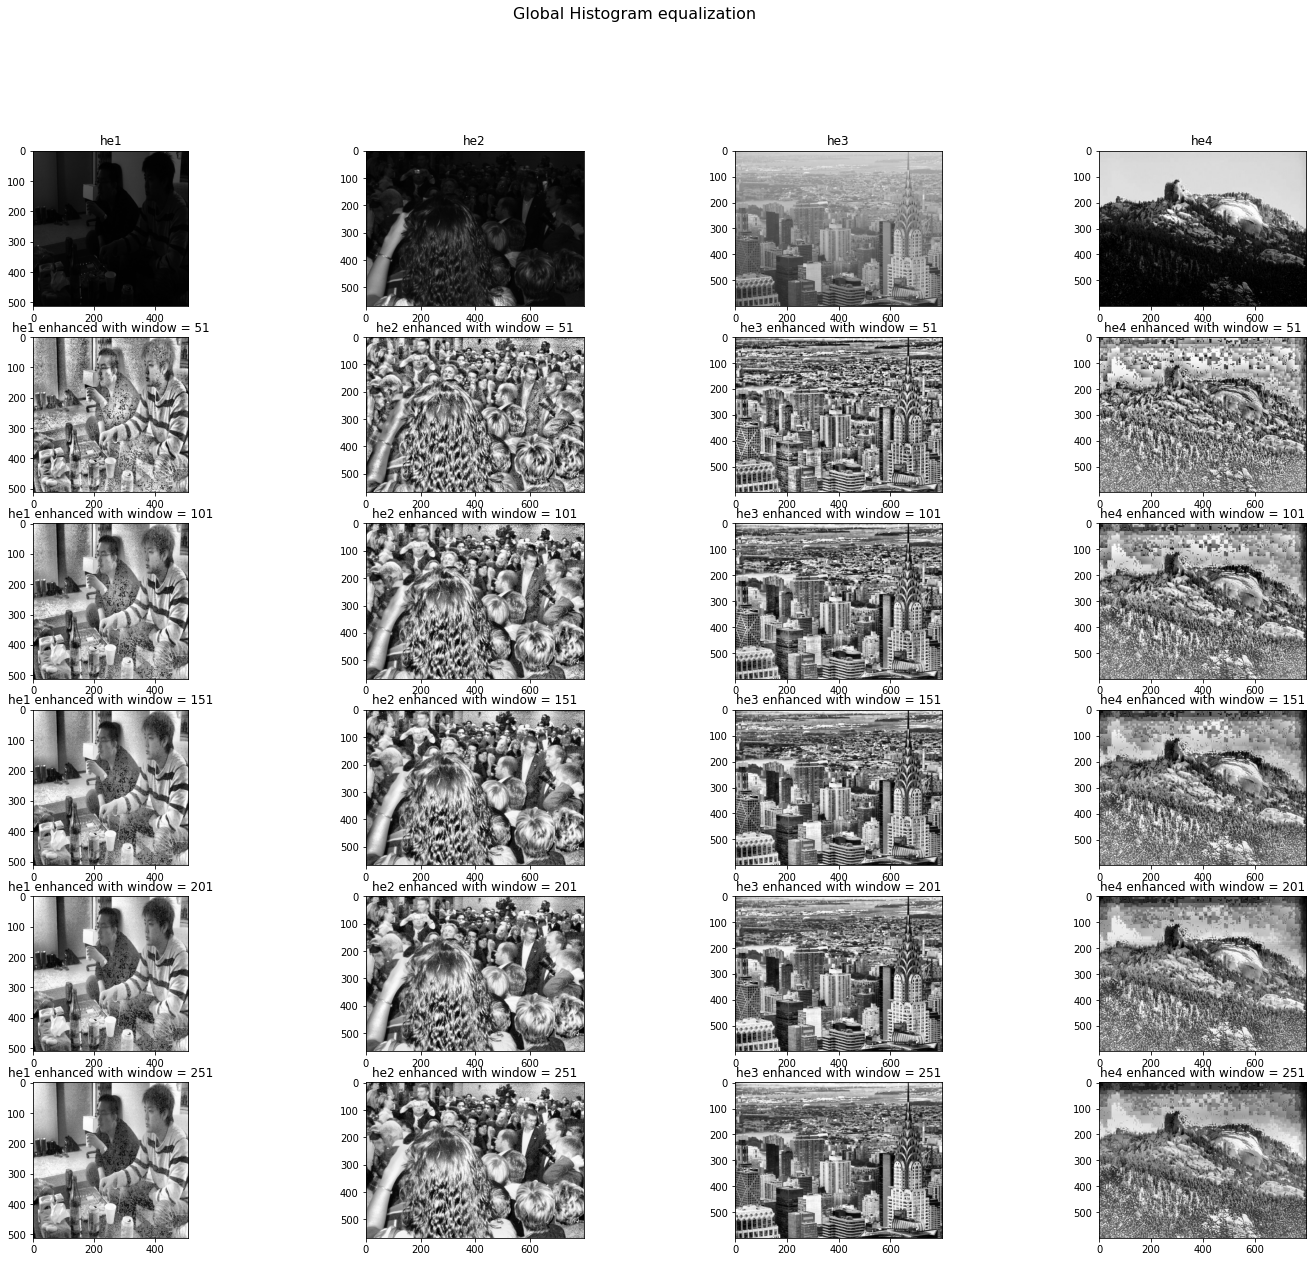

In [17]:
def extract_image(image, name="res"):
    pil_img=Image.fromarray((image).astype(np.uint8))
    pil_img.save("./" + str(name) +  ".png")
    return pil_img
fig, axs = plt.subplots(6, 4, figsize=(25, 20))
fig.suptitle('Global Histogram equalization', fontsize=16)
sizes = [51, 101, 151, 201, 251]
for i in range(5):
    base = np.zeros(bad_pic1.shape)
    temp = lhe_with_interpol(base, bad_pic1, sizes[i], sizes[i])
    axs[i+1][0].imshow(temp.astype(np.int32))
    axs[i+1][0].set_title('he1 enhanced with window = ' + str(sizes[i]))
    extract_image(temp, 'he1 enhanced with window = ' + str(sizes[i]))
    base = np.zeros(bad_pic2.shape)
    temp = lhe_with_interpol(base, bad_pic2, sizes[i], sizes[i])
    axs[i+1][1].imshow(temp.astype(np.int32))
    axs[i+1][1].set_title('he2 enhanced with window = ' + str(sizes[i]))
    extract_image(temp, 'he2 enhanced with window = ' + str(sizes[i]))

    base = np.zeros(bad_pic3.shape)
    temp = lhe_with_interpol(base, bad_pic3, sizes[i], sizes[i])
    axs[i+1][2].imshow(temp.astype(np.int32))
    axs[i+1][2].set_title('he3 enhanced with window = ' + str(sizes[i]))
    extract_image(temp, 'he3 enhanced with window = ' + str(sizes[i]))

    base = np.zeros(bad_pic4.shape)
    temp = lhe_with_interpol(base, bad_pic4, sizes[i], sizes[i])
    axs[i+1][3].imshow(temp.astype(np.int32))
    axs[i+1][3].set_title('he4 enhanced with window = ' + str(sizes[i]))
    extract_image(temp, 'he4 enhanced with window = ' + str(sizes[i]))

axs[0][0].imshow(bad_pic1.astype(np.int32))
axs[0][0].set_title('he1')

axs[0][1].imshow(bad_pic2.astype(np.int32))
axs[0][1].set_title('he2')

axs[0][2].imshow(bad_pic3.astype(np.int32))
axs[0][2].set_title('he3')

axs[0][3].imshow(bad_pic4.astype(np.int32))
axs[0][3].set_title('he4')

plt.show()